In [ ]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.backend import function
import matplotlib.pyplot as plt
from skimage.transform import resize
import keras
from tensorflow.keras.layers import Activation, Dense, Input
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.layers import Reshape, Conv2DTranspose
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

np.random.seed(1337)

In [ ]:
from keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

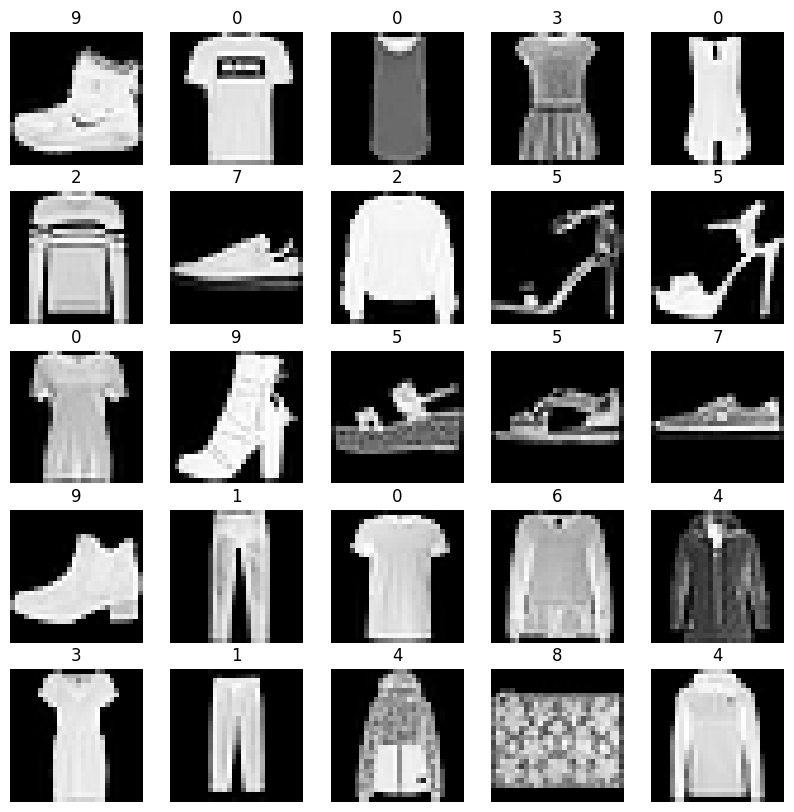

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(train_images[i], cmap='Greys_r')
    plt.title(train_labels[i])
    plt.axis('off')

plt.show()

In [ ]:
assert train_images.shape == (60000, 28, 28)
assert test_images.shape == (10000, 28, 28)
assert train_labels.shape == (60000,)
assert test_labels.shape == (10000,)

In [ ]:
train_images = train_images.astype('float32') / 255
#train_images = train_images.reshape((-1,28*28))

test_images = test_images.astype('float32') / 255
#test_images = test_images.reshape((-1,28*28))

In [ ]:
# summarize the shape of the dataset
print('Train', train_images.shape, train_labels.shape)
print('Test', test_images.shape, test_labels.shape)

Train (60000, 28, 28) (60000,)
Test (10000, 28, 28) (10000,)


In [ ]:
# Generate corrupted MNIST images by adding noise with normal dist
# centered at 0.5 and std=0.3
noise = np.random.normal(loc=0.5, scale=0.3, size=train_images.shape)
x_train_noisy = train_images + noise
noise = np.random.normal(loc=0.5, scale=0.3, size=test_images.shape)
x_test_noisy = test_images + noise

# Clip the images to be between 0 and 1
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)


#x_train_noisy = x_train_noisy.astype('float32') / 255
#x_train_noisy = x_train_noisy.reshape((-1,28*28))

#x_test_noisy = x_test_noisy.astype('float32') / 255
#x_test_noisy = x_test_noisy.reshape((-1,28*28))
#x_train_noisy.shape
x_test_noisy.shape

(10000, 28, 28)

In [ ]:
image_size = train_images.shape[1]
train_images = np.reshape(train_images, [-1, image_size, image_size, 1])
test_images = np.reshape(test_images, [-1, image_size, image_size, 1])
x_test_noisy = np.reshape(x_test_noisy, [-1, image_size, image_size, 1])

In [ ]:
# First build the Encoder Model
input = Input(shape=(image_size, image_size, 1), name='encoder_input')
x = Conv2D(32, (3, 3), activation="relu", padding="same")(input)
x = MaxPooling2D((2, 2), padding="same")(x)
x = Conv2D(32, (3, 3), activation="relu", padding="same")(x)
encoded = MaxPooling2D((2, 2), padding="same")(x)


In [ ]:
# Decoder
x = Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(encoded)
x = Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
decoded = Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)

In [ ]:
# Autoencoder
autoencoder = Model(input, decoded)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_21 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_transpose_14 (Conv2D  (None, 14, 14, 32)       9248

In [ ]:

autoencoder.fit(x = x_train_noisy,
                y = train_images,
                validation_split = 0.2,
                # validation_date = (x_test, x_test_noisy),
                epochs=100,
                shuffle = True,
                batch_size=128)

Epoch 1/100
375/375 [==============================] - 5s 9ms/step - loss: 0.3627 - val_loss: 0.3096
Epoch 2/100
375/375 [==============================] - 3s 8ms/step - loss: 0.3030 - val_loss: 0.2997
Epoch 3/100
375/375 [==============================] - 3s 8ms/step - loss: 0.2964 - val_loss: 0.2958
Epoch 4/100
375/375 [==============================] - 3s 8ms/step - loss: 0.2930 - val_loss: 0.2926
Epoch 5/100
375/375 [==============================] - 3s 8ms/step - loss: 0.2907 - val_loss: 0.2907
Epoch 6/100
375/375 [==============================] - 3s 7ms/step - loss: 0.2890 - val_loss: 0.2896
Epoch 7/100
375/375 [==============================] - 3s 8ms/step - loss: 0.2874 - val_loss: 0.2879
Epoch 8/100
375/375 [==============================] - 3s 7ms/step - loss: 0.2862 - val_loss: 0.2869
Epoch 9/100
375/375 [==============================] - 3s 8ms/step - loss: 0.2853 - val_loss: 0.2861
Epoch 10/100
375/375 [==============================] - 3s 7ms/step - loss: 0.2845 - val_lo

In [ ]:
x_decoded = autoencoder.predict(x_test_noisy)

313/313 [==============================] - 1s 2ms/step


In [ ]:
print(test_images.shape)
print(x_test_noisy.shape)
x_decoded.shape

(10000, 28, 28, 1)
(10000, 28, 28, 1)


(10000, 28, 28, 1)

In [ ]:
x_decoded.shape

(10000, 28, 28, 1)

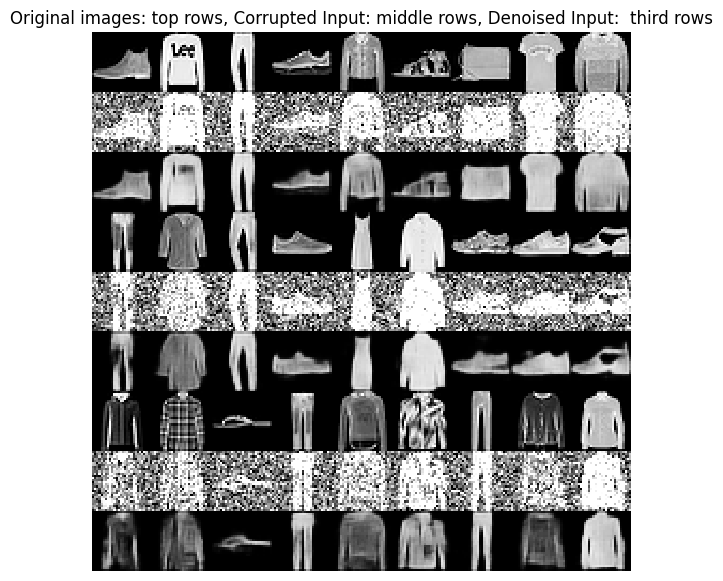

In [ ]:
# Display the 1st 10 corrupted and denoised images
rows, cols = 3, 9
num = rows * cols
imgs = np.concatenate([test_images[:num], x_test_noisy[:num], x_decoded[:num]])
imgs = imgs.reshape((rows * 3, cols, image_size, image_size))
imgs = np.vstack(np.split(imgs, rows, axis=1))
imgs = imgs.reshape((rows * 3, -1, image_size, image_size))
imgs = np.vstack([np.hstack(i) for i in imgs])
imgs = (imgs * 255).astype(np.uint8)

fig = plt.figure()
fig.set_figheight(7)
fig.set_figwidth(15)
plt.axis('off')
plt.title('Original images: top rows, '
          'Corrupted Input: middle rows, '
          'Denoised Input:  third rows')
plt.imshow(imgs, interpolation='none', cmap='gray')
Image.fromarray(imgs).save('corrupted_and_denoised.png')
plt.show()